## Customer Churn Prediction Using Artificial Neural Network (ANN)¶


Customer churn prediction is to measure why customers are leaving a business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
df.shape

(10000, 14)

In [56]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [57]:

df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [58]:
df['Geography'].nunique()

3

In [59]:
df.Geography

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [60]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [61]:
df[df['Exited']== 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


## VISUALIZATION

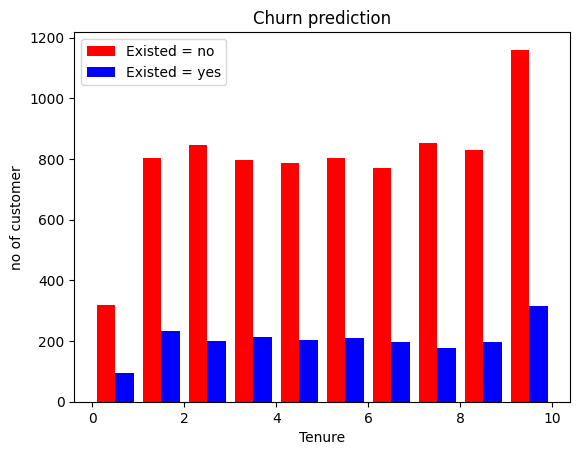

In [62]:
existed_yes = df[df['Exited']== 1].Tenure
existed_no = df[df['Exited']== 0].Tenure
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([existed_no,existed_yes], color = ['red', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

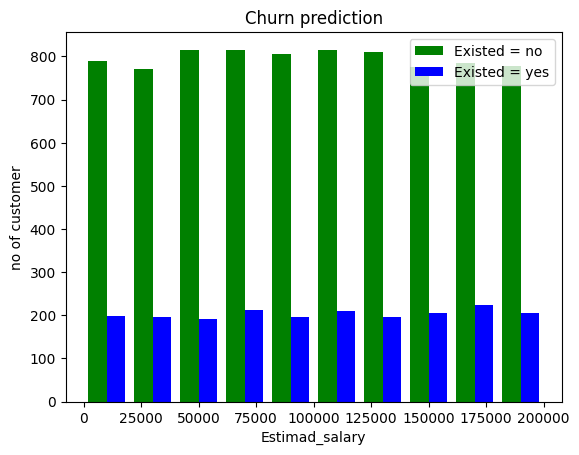

In [63]:
salary_no_existed = df[df.Exited== 0].EstimatedSalary
salary_yes_existed = df[df.Exited== 1].EstimatedSalary
plt.xlabel('Estimad_salary')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([salary_no_existed,salary_yes_existed], color = ['green', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

## Now convert the objects columns into binary(0,1) form

In [64]:
def unique_val(df):
    for col in df:
        if df[col].dtypes == "object":
            print(f'{col}:{df[col].unique}')

In [65]:
unique_val(df)

Geography:<bound method Series.unique of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>
Gender:<bound method Series.unique of 0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object>


In [66]:
for col in df :
    print(f'{col}:{df[col].unique()}')

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [67]:
# convert gender into 0,1
df['Gender'].replace({'Female' : 1,'Male':0}, inplace = True)

In [68]:
df.Gender.unique()

array([1, 0], dtype=int64)

## One hot encoding for categorical columns

In [69]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [70]:
scaled_col = ['CreditScore','Age','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df1[scaled_col] = scalar.fit_transform(df1[scaled_col])

In [71]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,2,0.000000,1,1,1,0.506735,1,True,False,False
1,0.516,1,0.310811,1,0.334031,1,0,1,0.562709,0,False,False,True
2,0.304,1,0.324324,8,0.636357,3,1,0,0.569654,1,True,False,False
3,0.698,1,0.283784,1,0.000000,2,0,0,0.469120,0,True,False,False
4,1.000,1,0.337838,2,0.500246,1,1,1,0.395400,0,False,False,True


In [72]:
X = df1.drop('Exited',axis = 'columns')
y = df1['Exited']

In [73]:
from sklearn.model_selection  import train_test_split
X_train,X_test , y_train ,y_test = train_test_split(X , y , test_size= 0.2, random_state = 5)


In [74]:
X_train.shape

(8000, 12)

In [75]:
y_train.shape

(8000,)

In [76]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,6,0.000000,2,0,0,0.096273,False,False,True
4154,0.752,0,0.216216,3,0.000000,2,1,0,0.981478,True,False,False
3881,0.476,1,0.621622,3,0.000000,1,1,1,0.948551,True,False,False
9238,0.846,1,0.432432,4,0.000000,2,1,0,0.646869,True,False,False
5210,0.402,0,0.229730,7,0.517012,2,0,0,0.434670,True,False,False
7487,0.602,1,0.513514,4,0.000000,1,0,0,0.421898,True,False,False
7542,0.314,1,0.216216,4,0.000000,2,1,1,0.303413,False,False,True
7524,0.620,1,0.297297,8,0.666330,1,1,1,0.925815,True,False,False
9412,0.750,0,0.108108,6,0.393324,1,0,0,0.668609,True,False,False
6377,0.684,0,0.202703,9,0.000000,1,1,0,0.567526,True,False,False


In [77]:
len(X_test.columns)

12

## BUILD ANN MODEL

In [78]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


In [79]:
import tensorflow as tf
from tensorflow import keras

model=  keras.Sequential([
    keras.layers.Dense(300, input_shape=(12,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100


250/250 [==============================] - 1s 1ms/step - loss: 0.4695 - accuracy: 0.8015
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8117
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8199
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8256
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8359
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8371
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8428
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8479
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8480
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8512
E

In [80]:
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [81]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8475


[0.3807457983493805, 0.8475000262260437]

In [82]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 903us/step


In [83]:
y_pred

array([[0.01216098],
       [0.04476708],
       [0.0279598 ],
       ...,
       [0.00724733],
       [0.00814689],
       [0.03748192]], dtype=float32)

In [84]:
y_test[:5]

7054    0.0
442     0.0
3954    0.0
2288    0.0
3196    0.0
Name: Exited, dtype: float32

In [85]:
yp = []
for element in y_pred:
    if element > 0.5:
        yp.append(1)
    else:
        yp.append(0)

## CONFUSION MATRIX

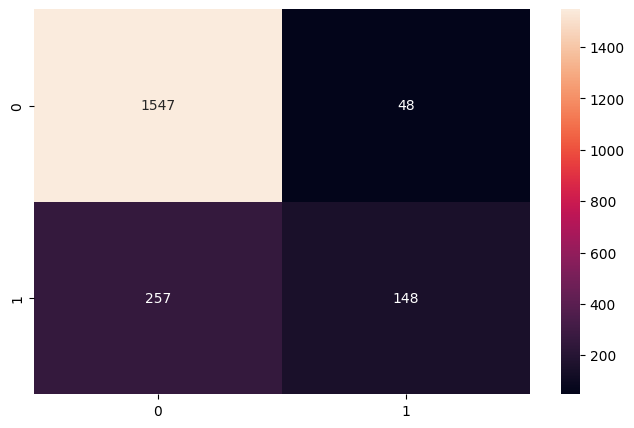

In [86]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=yp)
plt.figure(figsize=(8,5))
sns.heatmap(cm , annot=True,fmt = 'd')
plt.show()

In [87]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", f"{precision:.2f}")
print("Recall:", f"{recall:.2f}")
print("F1-Score:", f"{f1_score:.2f}")

Precision: 0.76
Recall: 0.37
F1-Score: 0.49
